In [37]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [38]:
training_data_genetation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

testing_data_generation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
)

In [39]:
training_set=training_data_genetation.flow_from_directory(
    r'C:\Users\sk620\Desktop\Major1\dataset\training',
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

Found 9435 images belonging to 2 classes.


In [40]:
testing_set=training_data_genetation.flow_from_directory(
    r'C:\Users\sk620\Desktop\Major1\dataset\testing',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 3706 images belonging to 1 classes.


In [41]:
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01),input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=1024,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=128,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=1,activation="relu"))

In [42]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\sk620\Desktop\Major1\archive\fire_and_smoke.h5',
                                            monitor='val_loss',mode="min",
                                            save_best_only=True)

callbacks=checkpoint

In [43]:
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
cnn.fit(
    x=training_set,
    validation_data=testing_set,
    epochs=30,callbacks=callbacks
)

Epoch 1/30
295/295 [==============================] - ETA: 0s - loss: 7.8750 - accuracy: 0.4878

C:\Users\sk620\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - 412s 1s/step - loss: 7.8750 - accuracy: 0.4878 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
295/295 [==============================] - 348s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
295/295 [==============================] - 339s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
295/295 [==============================] - 337s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
295/295 [==============================] - 337s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
295/295 [==============================] - 338s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
295/295 [==============================] - 342s 1s/step - loss: 7.8751 - accuracy: 0.4895 - val_loss: 0.0000e+00 - val

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [46]:
data=pd.read_csv(r'C:\Users\sk620\Desktop\Major1\accuracy_value.csv',delimiter=',')
data

,epoch,relu (Adam),leaky relu (Adam),relu (RMSprop),leaky relu (RMSprop)
0,1,0.9671,0.9731,0.9664,0.9670
1,2,0.9841,0.9750,0.9838,0.9771
2,3,0.9873,0.9837,0.9851,0.9827
3,4,0.9808,0.9861,0.9857,0.9840
4,5,0.9878,0.9897,0.9818,0.9808
5,6,0.9919,0.9905,0.9817,0.9845
6,7,0.9910,0.9918,0.9854,0.9858
7,8,0.9924,0.9916,0.9843,0.9866
8,9,0.9937,0.9943,0.9872,0.9852
9,10,0.9916,0.9926,0.9857,0.9840


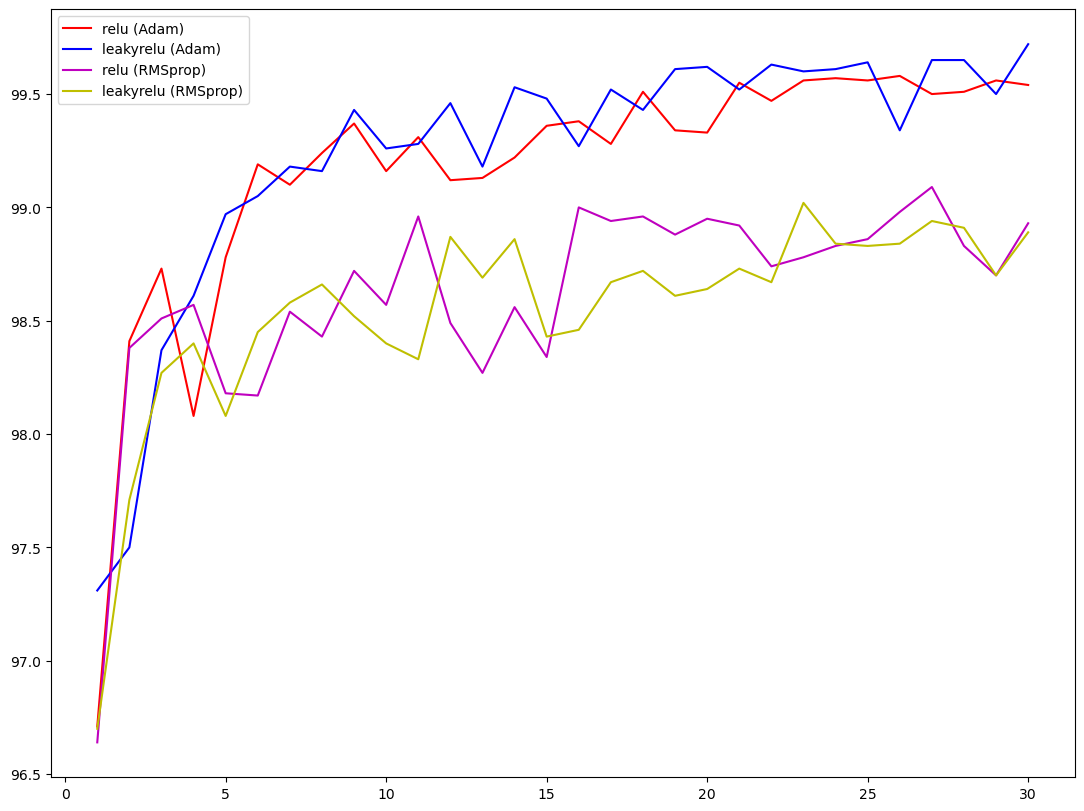

In [47]:
epoch=data['epoch']
relu_adam=100*data['relu (Adam)']
leaky_relu_adam=100*data['leaky relu (Adam)']
relu_RMSprop=100*data['relu (RMSprop)']
leaky_relu_RMSprop=100*data['leaky relu (RMSprop)']
fig=plt.figure()
myaxis=fig.add_axes([0.1,0.1,1.6,1.6])
myaxis.plot(epoch,relu_adam,'r',label='relu (Adam)')
myaxis.plot(epoch,leaky_relu_adam,'b',label='leakyrelu (Adam)')
myaxis.plot(epoch,relu_RMSprop,'m',label='relu (RMSprop)')
myaxis.plot(epoch,leaky_relu_RMSprop,'y',label='leakyrelu (RMSprop)')
myaxis.legend()

In [48]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\sk620\Desktop\Major1\archive\fire_and_smoke.h5')

In [49]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 8, 8, 256)        

In [50]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import PIL
import numpy as np
from tensorflow.keras.models import load_model

In [67]:
test_image=r'C:\Users\sk620\Desktop\Major1\dataset\training\Smoke\0002.jpg'

1/1 [==============================] - 0s 21ms/step


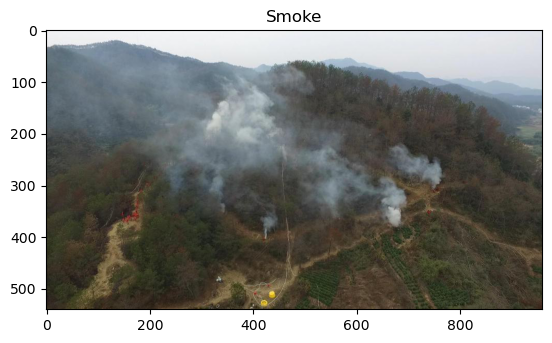

In [68]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Smoke','Fire']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()

In [69]:
test_image=r'C:\Users\sk620\Desktop\Major1\dataset\training\Fire\a.png'

1/1 [==============================] - 0s 31ms/step


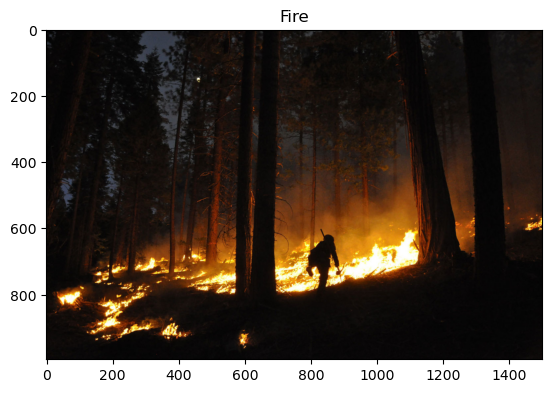

In [70]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Fire','Smoke']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()